
# 교통사고 데이터 EDA (정리본)

이 노트북은 데이터 이해 및 인사이트 도출을 위한 EDA 전용 노트북입니다.
모델링 코드는 포함하지 않습니다.


In [30]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'


In [31]:
accident = pd.read_csv("data/accident_df.csv", encoding="cp949")

print(accident.shape)
accident.head()


(14146, 19)


,발생년,발생월,발생일,발생시,주야,요일,발생지시도,사고유형_대분류,가해자법규위반,도로형태_대분류,가해자_당사자종별,피해자_당사자종별,경도,위도,사상자수,반경500m카메라수,반경500m학교수,반경500m전광판수,반경500m사고건수
0,2019,1,1,0,야,화,부산,차대사람,중앙선 침범,교차로,승용차,보행자,129.152465,35.157884,1.0,9,1,0,1
1,2019,1,1,3,야,화,경기,차대차,중앙선 침범,단일로,승용차,승용차,126.857149,37.288292,1.0,10,4,0,1
2,2019,1,1,16,주,화,경북,차대차,안전운전 의무 불이행,교차로,승용차,사륜오토바이(ATV),128.609230,35.650108,1.0,0,0,0,0
3,2019,1,1,19,야,화,대전,차대사람,안전운전 의무 불이행,교차로,승용차,보행자,127.379560,36.355946,1.0,6,0,0,2
4,2019,1,1,21,야,화,경북,차대사람,안전운전 의무 불이행,단일로,승용차,보행자,128.915041,35.899506,1.0,0,0,0,0


In [32]:

accident.info()
accident.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14146 entries, 0 to 14145
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   발생년         14146 non-null  int64  
 1   발생월         14146 non-null  int64  
 2   발생일         14146 non-null  int64  
 3   발생시         14146 non-null  int64  
 4   주야          14146 non-null  object 
 5   요일          14146 non-null  object 
 6   발생지시도       14146 non-null  object 
 7   사고유형_대분류    14146 non-null  object 
 8   가해자법규위반     14146 non-null  object 
 9   도로형태_대분류    14146 non-null  object 
 10  가해자_당사자종별   14146 non-null  object 
 11  피해자_당사자종별   14146 non-null  object 
 12  경도          14146 non-null  float64
 13  위도          14146 non-null  float64
 14  사상자수        14146 non-null  float64
 15  반경500m카메라수  14146 non-null  int64  
 16  반경500m학교수   14146 non-null  int64  
 17  반경500m전광판수  14146 non-null  int64  
 18  반경500m사고건수  14146 non-null  int64  
dtypes: float64(3), int64(8), 

,발생년,발생월,발생일,발생시,경도,위도,사상자수,반경500m카메라수,반경500m학교수,반경500m전광판수,반경500m사고건수
count,14146.000000,14146.000000,14146.000000,14146.000000,14146.000000,14146.000000,14146.000000,14146.000000,14146.000000,14146.000000,14146.000000
mean,2020.868938,6.788704,15.750247,12.355153,127.563807,36.367096,1.255252,3.185565,0.815920,0.209741,1.080023
std,1.411487,3.419937,8.832740,6.536050,0.854116,1.060066,0.798384,4.833867,1.269226,0.636172,1.463626
min,2019.000000,1.000000,1.000000,0.000000,125.900599,33.217963,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,4.000000,8.000000,7.000000,126.895622,35.486450,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2021.000000,7.000000,16.000000,13.000000,127.235989,36.441967,1.000000,1.000000,0.000000,0.000000,1.000000
75%,2022.000000,10.000000,23.000000,18.000000,128.306618,37.376130,1.000000,4.000000,1.000000,0.000000,2.000000
max,2023.000000,12.000000,31.000000,23.000000,129.578563,38.507834,28.300000,81.000000,10.000000,14.000000,12.000000


## 타겟 변수 분포

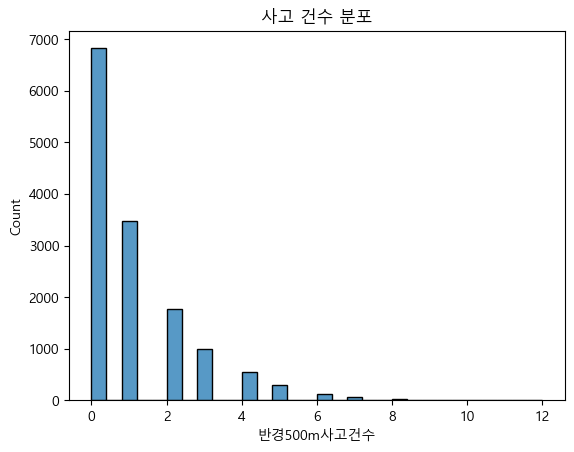

In [33]:

sns.histplot(accident['반경500m사고건수'], bins=30)
plt.title("사고 건수 분포")
plt.show()


## 주야별 사고 분석

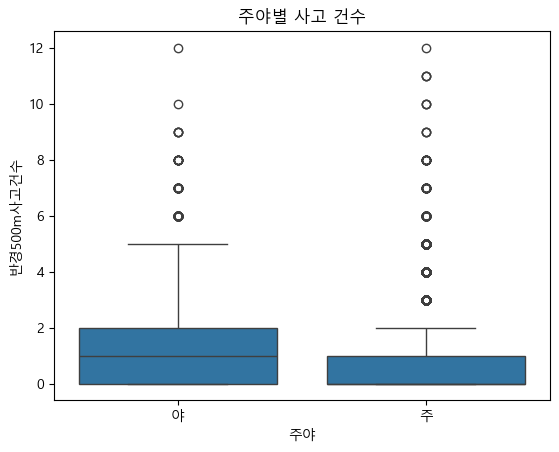

In [34]:

sns.boxplot(x='주야', y='반경500m사고건수', data=accident)
plt.title("주야별 사고 건수")
plt.show()


## 도로 형태별 사고 분석

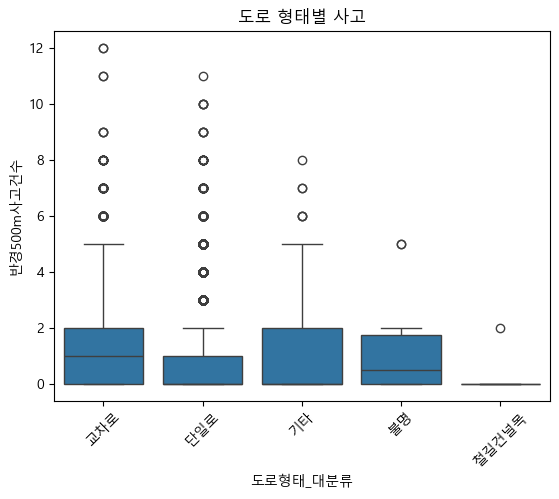

In [35]:

sns.boxplot(x='도로형태_대분류', y='반경500m사고건수', data=accident)
plt.title("도로 형태별 사고")
plt.xticks(rotation=45)
plt.show()


## 지역별 사고 분석

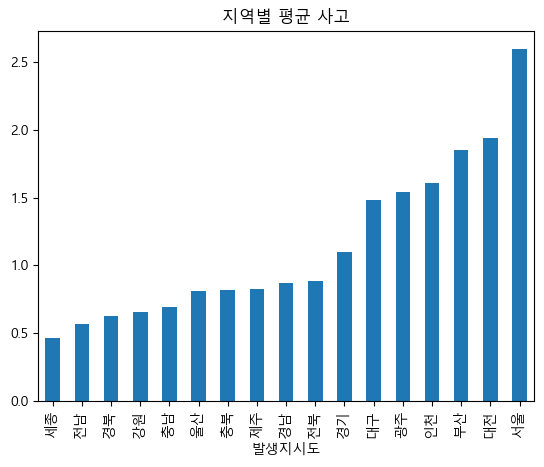

In [36]:

accident.groupby('발생지시도')['반경500m사고건수'].mean().sort_values().plot(kind='bar')
plt.title("지역별 평균 사고")
plt.show()


## 상관관계 분석

c:\Users\Hyeonseong\Documents\sy_projects\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\Hyeonseong\Documents\sy_projects\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


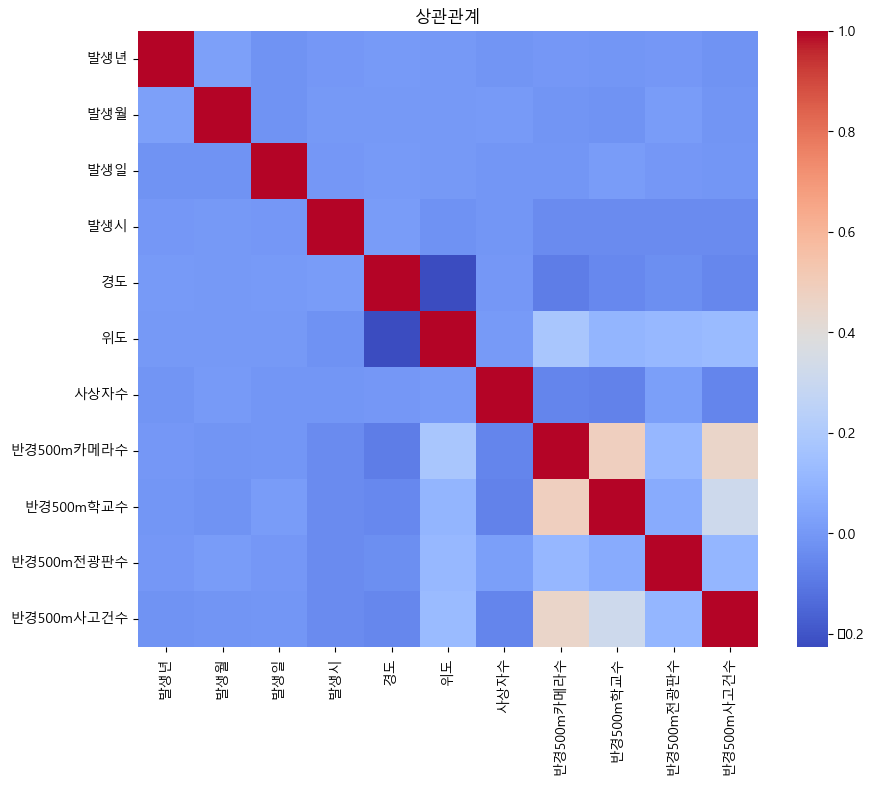

In [37]:

corr = accident.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm')
plt.title("상관관계")
plt.show()



## 인사이트

- 사고 건수는 특정 지역과 도로 환경에서 집중되는 경향이 있다  
- 교차로 및 야간 환경에서 사고 위험이 증가한다  
- 반경 내 시설물(카메라, 학교, 전광판)이 사고 발생과 관련성이 있다  
- 비선형 관계가 존재할 가능성이 높아 트리 기반 모델이 적합하다  
